# Section 1: Introduction

Probabilistic Graphical Models (PGMs) are a robust approach to representing joint probability distributions on a set of random variables, enabling computationally efficient inferences. PGMs leverage independent conditions between random variables to create a graph structure that represents the relationships among them. By combining various parameters taken from the graph, we can calculate the joint probability distribution of these variables.

Bayesian Graph Models are a type of PGM that consists of a Directed Acyclic Graph (DAG) with a conditional probability associated with each random variable. These models represent causation between the random variables.

Pgmpy is a Python framework that enables working with these graph models. It includes several graph models and inference algorithms, and users can even create their own inference algorithms without delving into the details of the source code. Let us now proceed to the implementation part.

Note that you are expected to provide explanations of the functions' outputs.

# Section 2: Creating the Model (25 points)

In this section, you will implement this bayesian network using pgmpy library.

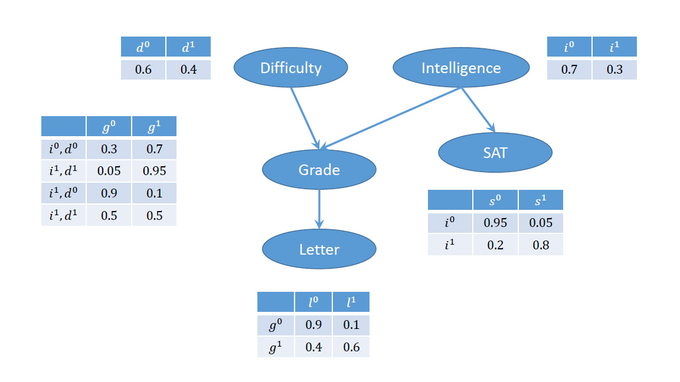

In [34]:
#!pip install pgmpy

In [35]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.factors.discrete import State
from pgmpy.sampling import BayesianModelSampling
from pgmpy.sampling import GibbsSampling
from pgmpy.inference import VariableElimination
from pgmpy.inference.EliminationOrder import WeightedMinFill
from pgmpy.factors.discrete import State

In [36]:
#Step 1: Define the model using BayesianNetwork
model = BayesianNetwork([('Difficulty', 'Grade'), ('Intelligence', 'Grade'), ('Grade', 'Letter'), ('Intelligence', 'SAT')])

In [37]:
#Step 2: Define the CPDs using TabularCPD and then add them to the model
cpd_d = TabularCPD(variable='Difficulty', variable_card=2, values=[[0.6], [0.4]])
cpd_i = TabularCPD(variable='Intelligence', variable_card=2, values=[[0.7], [0.3]])

cpd_g = TabularCPD(variable='Grade', variable_card=2,
                   values=[[0.3, 0.05, 0.9,  0.5],
                           [0.7, 0.95, 0.1, 0.5]],
                  evidence=['Intelligence', 'Difficulty'],
                  evidence_card=[2, 2])

cpd_l = TabularCPD(variable='Letter', variable_card=2,
                   values=[[0.9, 0.4],
                           [0.1, 0.6]],
                   evidence=['Grade'],
                   evidence_card=[2])

cpd_s = TabularCPD(variable='SAT', variable_card=2,
                   values=[[0.95, 0.2],
                           [0.05, 0.8]],
                   evidence=['Intelligence'],
                   evidence_card=[2])

model.add_cpds(cpd_d, cpd_i, cpd_g, cpd_l, cpd_s)
model.check_model()

True

# Section 3: Operations (15 points)

Use the appropriate functions to answer the questions

1. What are the active trail nodes for *Intelligence*?

In [38]:
model.active_trail_nodes('Intelligence')

{'Intelligence': {'Grade', 'Intelligence', 'Letter', 'SAT'}}

2. Are *Difficulty* and *Intelligence* D-connected? What if we have *Letter* as evidence?

In [39]:
print(model.is_dconnected("Difficulty", "Intelligence"))
print(model.is_dconnected("Difficulty", "Intelligence", observed=["Letter"]))

False
True


3. Print all independencies.

In [40]:
model.get_independencies()

(SAT ⟂ Difficulty)
(SAT ⟂ Difficulty, Grade, Letter | Intelligence)
(SAT ⟂ Letter | Grade)
(SAT ⟂ Grade, Letter | Intelligence, Difficulty)
(SAT ⟂ Letter | Grade, Difficulty)
(SAT ⟂ Difficulty, Letter | Intelligence, Grade)
(SAT ⟂ Difficulty, Grade | Intelligence, Letter)
(SAT ⟂ Letter | Intelligence, Grade, Difficulty)
(SAT ⟂ Grade | Intelligence, Difficulty, Letter)
(SAT ⟂ Difficulty | Intelligence, Grade, Letter)
(Grade ⟂ SAT | Intelligence)
(Grade ⟂ SAT | Intelligence, Difficulty)
(Grade ⟂ SAT | Intelligence, Letter)
(Grade ⟂ SAT | Intelligence, Difficulty, Letter)
(Difficulty ⟂ SAT, Intelligence)
(Difficulty ⟂ Intelligence | SAT)
(Difficulty ⟂ SAT | Intelligence)
(Difficulty ⟂ Letter | Grade)
(Difficulty ⟂ Letter | SAT, Grade)
(Difficulty ⟂ SAT, Letter | Intelligence, Grade)
(Difficulty ⟂ SAT | Intelligence, Letter)
(Difficulty ⟂ Letter | SAT, Intelligence, Grade)
(Difficulty ⟂ SAT | Intelligence, Grade, Letter)
(Letter ⟂ SAT | Intelligence)
(Letter ⟂ SAT, Intelligence, Difficulty

# Section 4: Variable Elimination (25 points)

Get the induced graph formed by running Variable Elimination on the network. Print the induced graph and the elimination order.

In [41]:
order = WeightedMinFill(model).get_elimination_order()
order

  0%|          | 0/5 [00:00<?, ?it/s]

['SAT', 'Letter', 'Intelligence', 'Grade', 'Difficulty']

In [42]:
inference = VariableElimination(model)
print(inference.induced_width(order))

2


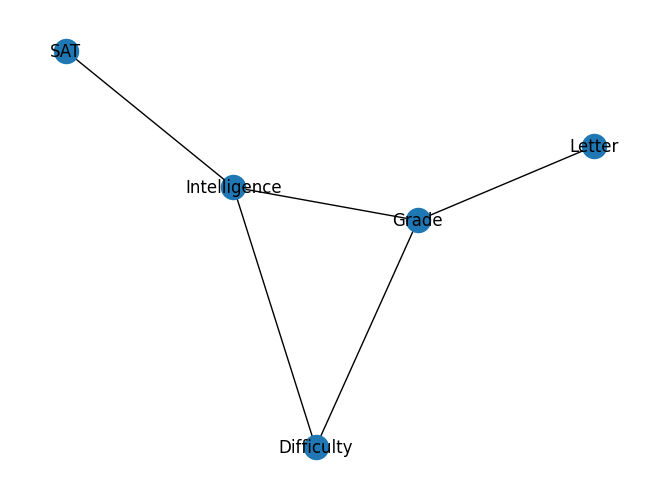

In [43]:
import networkx as nx
import pylab as plt
nx.draw(inference.induced_graph(order), with_labels=True)
plt.show()

# Section 5: Sampling (35 points)

Try forward sampling on your model.

In [44]:
inference = BayesianModelSampling(model)
inference.forward_sample(size=4)

  0%|          | 0/5 [00:00<?, ?it/s]

,Difficulty,Grade,Intelligence,Letter,SAT
0,0,1,0,1,0
1,0,1,0,1,0
2,0,0,0,0,0
3,1,1,0,1,0


Try likelihood weighting sampling on your model.

In [45]:
evidence = [State('SAT', 1)]
inference.likelihood_weighted_sample(evidence = evidence, size = 4)

  0%|          | 0/5 [00:00<?, ?it/s]

,Difficulty,Grade,Intelligence,Letter,SAT,_weight
0,0,1,0,0,1,0.05
1,1,1,0,1,1,0.05
2,0,0,0,0,1,0.05
3,1,1,0,1,1,0.05


Try rejection sampling on your model.

In [46]:
evidence = [State(var='SAT', state = 1)]
inference.rejection_sample(evidence = evidence, size = 4)

  0%|          | 0/4 [00:00<?, ?it/s]

,Difficulty,Grade,Intelligence,Letter,SAT
0,1,0,1,0,1
1,1,1,1,1,1
2,0,0,1,0,1
3,1,1,1,1,1


And finally, try Gibbs sampling.

In [47]:
gibbs = GibbsSampling(model)
gibbs.sample(size = 4)

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/pgmpy/utils/mathext.py:82: UserWarning: Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
  warn(


,Difficulty,Grade,Intelligence,Letter,SAT
0,0,0,1,1,1
1,0,1,1,0,1
2,1,1,1,1,1
3,1,1,1,1,1


Provide a detailed explanation of the results and consider which approach would be most suitable for your model.

In [48]:
# This part depends on the student's comprehention. As long as the explanation and details are correct, this part gets full mark. 